In [0]:
import numpy as np
np.random.seed(10)

In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

Using TensorFlow backend.


In [0]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

#把LABEL轉成NUMERICAL Categorical 
from keras.utils import to_categorical
y_Train_OneHot = to_categorical(y_train_label)
y_Test_OneHot = to_categorical(y_test_label)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_train_history(train_history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(train_history.history['acc'], label='train')
    ax1.plot(train_history.history['val_acc'], label='validation')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    
    ax2.plot(train_history.history['loss'], label='train')
    ax2.plot(train_history.history['val_loss'], label='validation')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    
    plt.tight_layout()
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 7s 139us/step - loss: 0.2697 - acc: 0.9221 - val_loss: 0.1319 - val_acc: 0.9617
Epoch 2/10
48000/48000 [==============================] - 6s 132us/step - loss: 0.1072 - acc: 0.9684 - val_loss: 0.1034 - val_acc: 0.9686
Epoch 3/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0709 - acc: 0.9782 - val_loss: 0.0938 - val_acc: 0.9722
Epoch 4/10
48000/48000 [==============================] - 7s 136us/step - loss: 0.0507 - acc: 0.9843 - val_loss: 0.0817 - val_acc: 0.9759
Epoch 5/10
48000/48000 [==============================] - 6s 133us/step - loss: 0.0373 - acc: 0.9878 - val_loss: 0.0782 - val_acc: 0.9762
Epoch 6/10
48000/48000 [==============================] - 6s 134us/step - loss: 0.0259 - acc: 0.9922 - val_loss: 0.0793 - val_acc: 0.9764
Ep

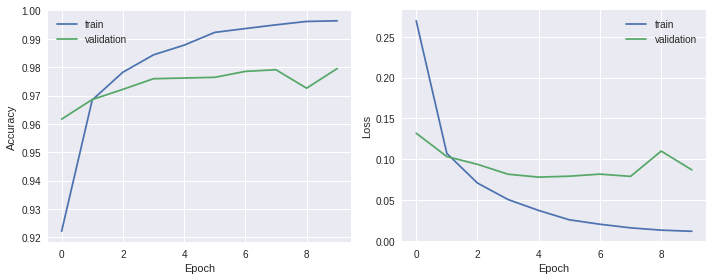

In [5]:
from keras.models import Sequential
from keras.layers import Dense

#建立模型
model = Sequential()
model.add(Dense(256, kernel_initializer='normal', activation='relu', input_shape=(784,)))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_Train_normalize, y_Train_OneHot,
                   validation_split=0.2, epochs=10, batch_size=32, verbose=1)

show_train_history(history)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 175us/step - loss: 0.2358 - acc: 0.9298 - val_loss: 0.1526 - val_acc: 0.9503
Epoch 2/10
48000/48000 [==============================] - 8s 171us/step - loss: 0.0919 - acc: 0.9715 - val_loss: 0.1046 - val_acc: 0.9688
Epoch 3/10
48000/48000 [==============================] - 8s 171us/step - loss: 0.0631 - acc: 0.9805 - val_loss: 0.0941 - val_acc: 0.9737
Epoch 4/10
48000/48000 [==============================] - 8s 169us/step - loss: 0.0472 - acc: 0.9854 - val_loss: 0.0914 - val_acc: 0.9722
Epoch 5/10
48000/48000 [==============================] - 8s 169us/step - loss: 0.0366 - acc: 0.9884 - val_loss: 0.0885 - val_acc: 0.9756
Epoch 6/10
48000/48000 [==============================] - 8s 169us/step - loss: 0.0312 - acc: 0.9898 - val_loss: 0.0994 - val_acc: 0.9750
Epoch 7/10
48000/48000 [==============================] - 8s 171us/step - loss: 0.0246 - acc: 0.9918 - val_loss: 0.1019 - 

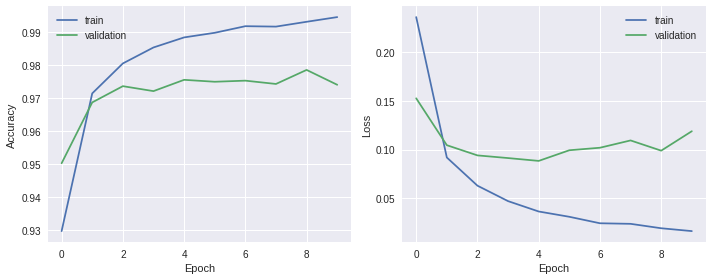

In [6]:
#建立模型
model = Sequential()
model.add(Dense(256, kernel_initializer='normal', activation='relu', input_shape=(784,)))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='softmax'))

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(x_Train_normalize, y_Train_OneHot,
                   validation_split=0.2, epochs=10, batch_size=32, verbose=1)

show_train_history(history)